<a href="https://colab.research.google.com/github/ramboo1/RL/blob/main/MonteCarloFirstVisit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import gym
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [17]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [26]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [27]:
states, actions, rewards = [], [], []
def generate_episode(policy, env):

  observation = env.reset()

  while True:
    states.append(observation)

    action = sample_policy(observation)
    actions.append(observation)

    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
      break
  return states, actions, rewards

[] [] []


In [28]:
def first_visit_mc_prediction(policy, env, n_episodes):
    value_table = defaultdict(float)
    N = defaultdict(int)

    for _ in range(n_episodes):
        states, _, rewards = generate_episode(policy, env)
        returns = 0

        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            
            returns += R      
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    
    return value_table

In [ ]:
value = first_visit_mc_prediction(sample_policy, env, n_episodes=10000)

In [31]:
for i in range(10):
  print(value.popitem())
  
print(states)
print(actions)
print(rewards)

((16, 9, True), -23.07446808510639)
((4, 9, False), -29.049019607843135)
((6, 9, False), -29.049019607843135)
((17, 7, True), -33.540909090909096)
((4, 7, False), -59.31104651162789)
((18, 8, True), -58.795389048991346)
((10, 6, False), -61.47138964577657)
((20, 3, True), -60.9242819843342)
((9, 6, False), -60.284237726098155)
((20, 6, True), -60.284237726098155)
[(11, 7, False), (17, 7, False), (16, 10, False), (18, 10, False), (14, 10, False), (21, 10, False), (12, 2, False), (17, 2, False), (14, 4, False), (5, 10, False), (7, 10, False), (10, 10, False), (14, 10, False), (21, 10, True), (16, 2, False), (20, 2, False), (10, 8, False), (20, 8, False), (16, 2, False), (14, 9, False), (19, 9, False), (11, 5, False), (13, 5, False), (16, 5, False), (15, 4, False), (14, 2, False), (17, 2, False), (13, 10, True), (14, 10, True), (18, 10, True), (14, 10, False), (19, 10, False), (12, 9, False), (5, 1, False), (7, 1, False), (10, 1, False), (20, 1, False), (16, 1, True), (16, 1, False), (15,

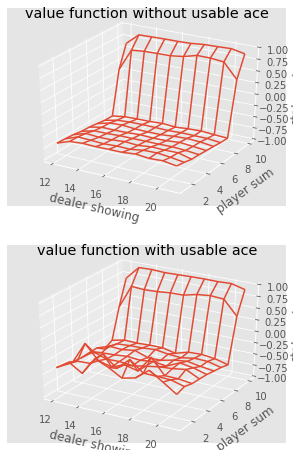

In [9]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]
    
    X, Y = np.meshgrid(player_sum, dealer_show)
 
    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')
        
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])